In [1]:
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


In [2]:
# read in the csv file
ds <- read.csv("data.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
zoo <- read.zoo(ds, sep=",", FUN=as.yearqtr)

# us ts to convert the zoo object to ts object using the correct intervals
ts = ts(zoo, frequency=4, start=c(1980,1), end=c(2015, 4))

In [14]:
rev = ts[,3]
ms = ts[,4]

## Check for T/S
There is definitely trend and seasonality. So this data needs to be transformed and maybe differenced

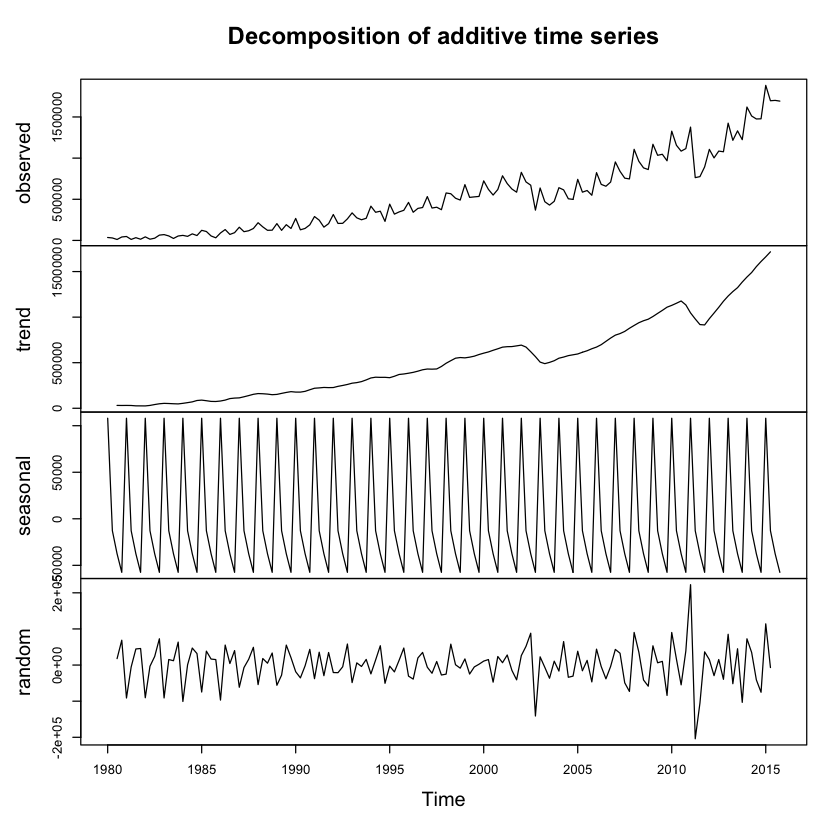

In [4]:
plot(decompose(rev))

## ADF of Raw Data
The ADF of the raw data shows that the data is non-stationary

In [5]:
adf.test(rev, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  rev
Dickey-Fuller = -0.85, Lag order = 5, p-value = 0.955
alternative hypothesis: stationary


## Difference the data

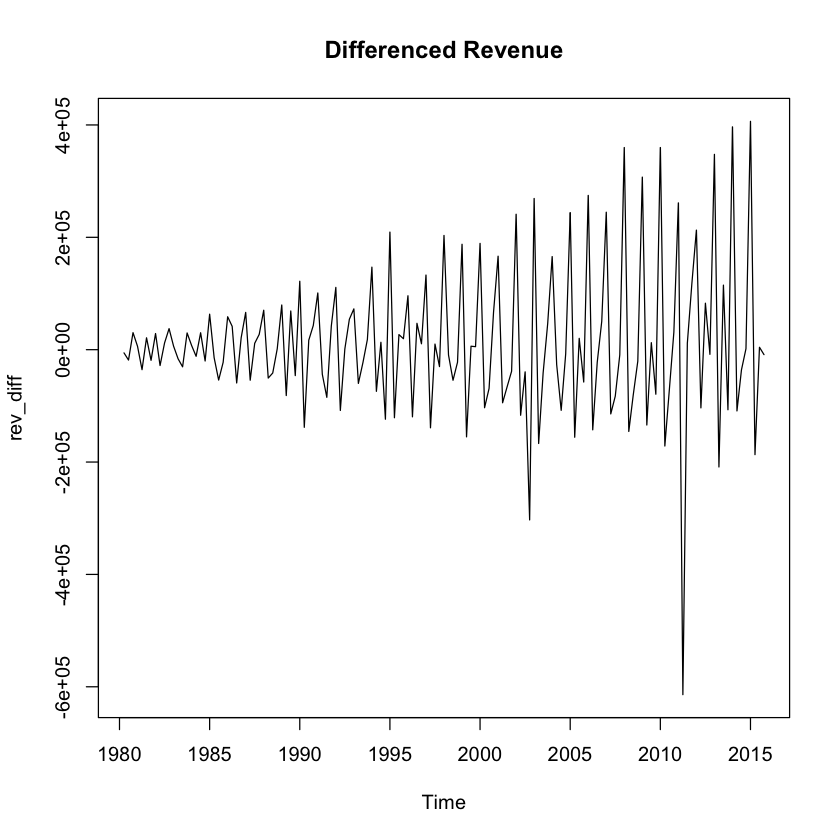

In [6]:
rev_diff = diff(rev)
plot(rev_diff, main="Differenced Revenue")

## ADF of Differenced Data
The ADF of the differenced data shows that we can reject the null hypo of the data being non-stationary since our p-value is smaller than .05. The differened data is stationary. Thus we can use ARIMA models.

In [7]:
adf.test(rev_diff)

Warning message in adf.test(rev_diff):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  rev_diff
Dickey-Fuller = -4.7431, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


## Auto ARIMA
Run an auto.arima just to see what it comes up with.

In [8]:
aa = auto.arima(rev, approximation=FALSE, trace=FALSE)
summary(aa)

Series: rev 
ARIMA(0,1,1)(0,1,1)[4]                    

Coefficients:
          ma1     sma1
      -0.2884  -0.7462
s.e.   0.0833   0.0501

sigma^2 estimated as 5.083e+09:  log likelihood=-1751.17
AIC=3508.34   AICc=3508.52   BIC=3517.15

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE     MASE        ACF1
Training set 5309.411 69542.61 43694.13 -4.334411 18.0843 0.504153 0.002931264


## ACF/PACF of model
The ACF/PACF show that we have a model with residuals of white noise.

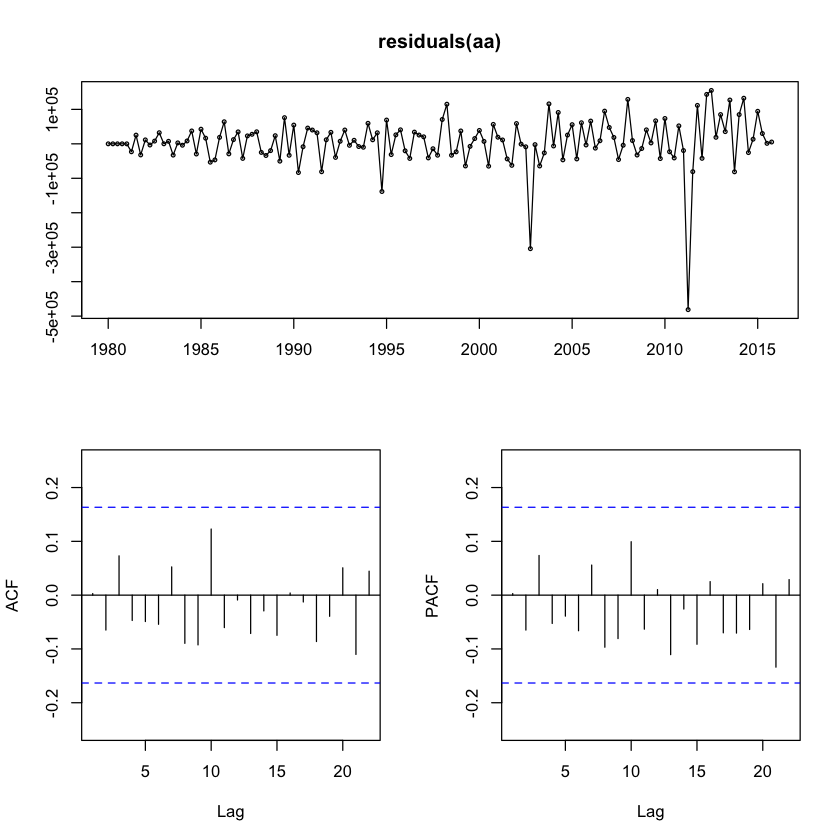

In [10]:
tsdisplay(residuals(aa))

In [11]:
a4_fit = Arima(rev, order=c(0, 1, 1), seasonal=c(0, 1, 2))
summary(a4_fit)

Series: rev 
ARIMA(0,1,1)(0,1,2)[4]                    

Coefficients:
          ma1     sma1    sma2
      -0.2851  -0.7750  0.0322
s.e.   0.0836   0.0941  0.0880

sigma^2 estimated as 5.113e+09:  log likelihood=-1751.11
AIC=3510.21   AICc=3510.51   BIC=3521.95

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE        ACF1
Training set 5339.157 69491.85 43652.25 -4.321858 18.0899 0.5036699 0.003359916


In [12]:
future$mean

        Qtr1    Qtr2    Qtr3    Qtr4
2016 2029855 1841019 1850709 1838230
2017 2176672 1987836 1997525 1985047

In [20]:
fit_reg = Arima(rev, xreg=ms, order=c(0,1,1), seasonal=c(0,1,1))

In [21]:
summary(fit_reg)

Series: rev 
ARIMA(0,1,1)(0,1,1)[4]                    

Coefficients:
          ma1     sma1        ms
      -0.2859  -0.7385  19308.08
s.e.   0.0838   0.0528  12425.43

sigma^2 estimated as 5.036e+09:  log likelihood=-1749.96
AIC=3507.91   AICc=3508.21   BIC=3519.65

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 5407.354 68962.88 43951.78 -4.805913 18.69417 0.5071259
                    ACF1
Training set 0.002956298
